<a href="https://colab.research.google.com/github/sadrireza/Neural-Networks/blob/main/Implementing%20SHAP%20in%20OCCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install shap

In [13]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  BatchNormalization, LeakyReLU,Dropout,ReLU
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
import shap

In [14]:
!ls /content

 ACCURACY_OCCNN.py	     OCCNN_3.py
 ANOMALY_Z.npy		     sample_data
 FEATURES_COMP.npy	    'To relate the provided code to the PDF document you.docx'
 FEATURE_TEST_COMP.npy	     Usermanual.docx
 FEATURE_TRAINING_COMP.npy


In [15]:
# Loading Data
training = np.load("FEATURE_TRAINING_COMP.npy")
test = np.load("FEATURE_TEST_COMP.npy")
X_Z = np.load("ANOMALY_Z.npy")

# New section

In [16]:
# Label Creation
X = np.append(training,X_Z,axis=0)
L_1 = [1,0]
L_2 = [0,1]
Label_1 = [L_1 for i in range(len(training))]
Label_2 = [L_2 for i in range(len(X_Z))]
Label_1 = np.array(Label_1)
Label_2 = np.array(Label_2)
Label = np.append(Label_1, Label_2, axis=0)
hidden_layer = 50

In [17]:
# Model Creation
tf.keras.backend.clear_session()
model = Sequential(
    [
        Dense(hidden_layer,input_shape=(3,), activation="relu", name="Input_Layer"),
        Dense(hidden_layer, activation="relu", name="layer2"),
        Dense(2,activation="softmax", name="Last_layer"),
    ]
)

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy'],
    optimizer=opt,
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 50)                200       
                                                                 
 layer2 (Dense)              (None, 50)                2550      
                                                                 
 Last_layer (Dense)          (None, 2)                 102       
                                                                 
Total params: 2852 (11.14 KB)
Trainable params: 2852 (11.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#Integrating shap into our model
explainer= shap.Explainer(model,X)

In [20]:
#First Training
kf = KFold(n_splits=5,shuffle=True) #Cross Validation to avoid biases in the designed classifications
kf.split(X)
accuracy_model = []
z = 0
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Label[train_index],Label[test_index]
    # Train the model
    print(X_train.shape)
    train_report = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=0)
    # Append to accuracy_model the accuracy of the model
    print("******Evaluate on test data with the model:**********",z)
    z = z+1
    results = model.evaluate(X_test, y_test)
    print("test loss, test acc:", results)
    print(train_report.history.keys())

(6720, 3)
******Evaluate on test data with the model:********** 0
53/53 [==============================] - 0s 2ms/step - loss: 0.0888 - accuracy: 0.9726
test loss, test acc: [0.08879750221967697, 0.9726190567016602]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
(6720, 3)
******Evaluate on test data with the model:********** 1
53/53 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9774
test loss, test acc: [0.06896325945854187, 0.9773809313774109]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
(6720, 3)
******Evaluate on test data with the model:********** 2
53/53 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9798
test loss, test acc: [0.06414961069822311, 0.9797618985176086]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
(6720, 3)
******Evaluate on test data with the model:********** 3
53/53 [==============================] - 0s 2ms/step - loss: 0.0831 - accuracy: 0.9667
test loss, test acc

In [21]:
# Label Test Creation

n_good = 4922-3400
n_bad = len(test)-n_good
Lable_1 = [1,0]
Lable_2 = [0,1]
Label_1 = [Lable_1 for i in range(n_good)]

Label_2 = [Lable_2 for i in range(n_bad)]
Label_1 = np.array(Label_1)
Label_2 = np.array(Label_2)
Label = np.append(Label_1, Label_2, axis=0)
model.evaluate(test, Label)

71/71 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9471


[0.11212470382452011, 0.9471346139907837]

In [22]:
#Cycle 2
P_pred = model.predict(X_Z)
Adversal = X_Z[P_pred[:,0]<0.5,:]
len(Adversal)

#fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Adversal[:,0], Adversal[:,1], Adversal[:,2], alpha=0.5, color='red')
#ax.set_xlabel('f1')
#ax.set_ylabel('f2')
#ax.set_zlabel('TDT2')
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)
#ax.set_title('Feature space')
#plt.show()


157/157 [==============================] - 0s 1ms/step


4849

ExactExplainer explainer: 1651it [00:10, 11.49it/s]                           


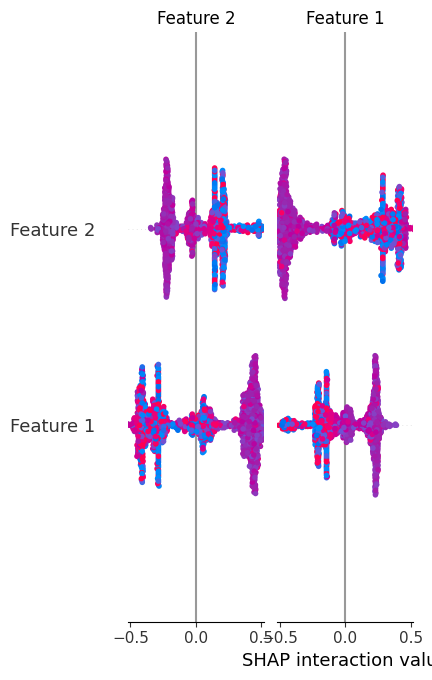

******Evaluate on test data with the model:**********
52/52 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9988
Test loss, test acc: [0.0027892354410141706, 0.9987878799438477]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


ExactExplainer explainer: 1651it [00:11, 22.62it/s]                           


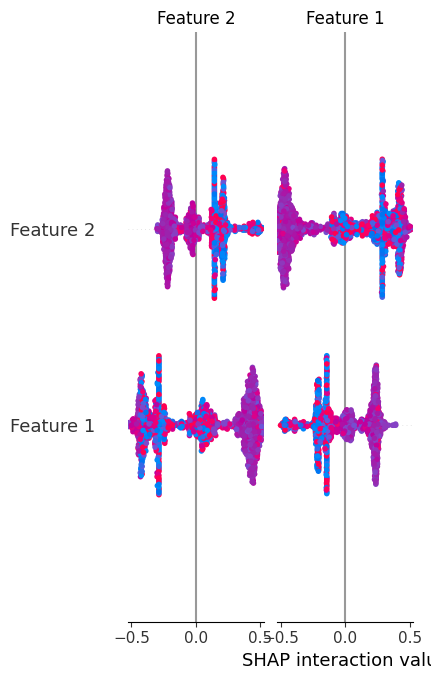

******Evaluate on test data with the model:**********
52/52 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Test loss, test acc: [0.00171077495906502, 1.0]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


ExactExplainer explainer: 1651it [00:10, 10.10it/s]                           


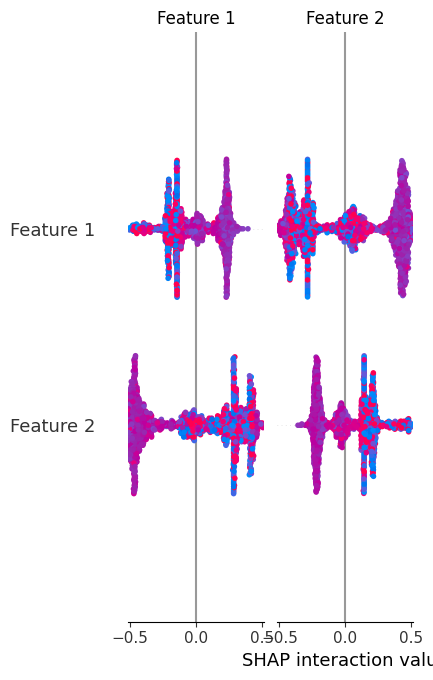

******Evaluate on test data with the model:**********
52/52 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Test loss, test acc: [0.003009173320606351, 0.9993939399719238]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


ExactExplainer explainer: 1651it [00:10, 10.56it/s]                           


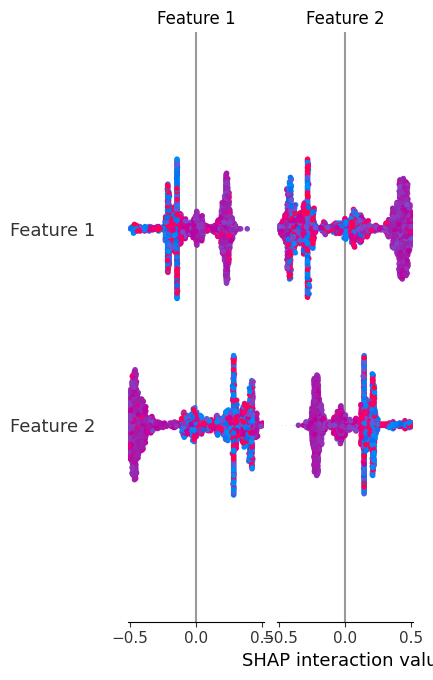

******Evaluate on test data with the model:**********
52/52 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Test loss, test acc: [0.0032102775294333696, 0.9993939399719238]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


ExactExplainer explainer: 1650it [00:10,  9.38it/s]                           


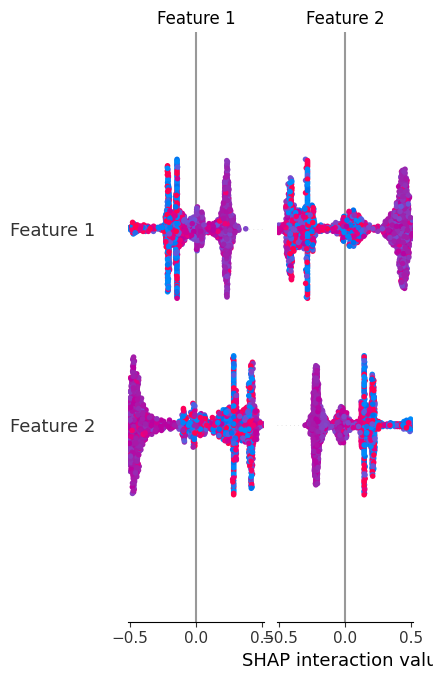

******Evaluate on test data with the model:**********
52/52 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9994
Test loss, test acc: [0.0018218029290437698, 0.9993935823440552]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [42]:
#Preparation of Training Cycle 2
X = np.append(training,Adversal,axis=0)
L_1 = [1, 0]
L_2 = [0, 1]
Label_1 = [L_1 for i in range(len(training))]
Label_2 = [L_2 for i in range(len(Adversal))]
Label_1 = np.array(Label_1)
Label_2 = np.array(Label_2)
Label = np.append(Label_1, Label_2, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, Label, test_size=0.3)

kf = KFold(n_splits=5,shuffle=True)
kf.split(X)
accuracy_model = []
z = 0

sort_inds = np.arange(len(feature_names))  # Initialize sort_inds with default order

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Label[train_index], Label[test_index]
    # Train the model
    train_report = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=0)
    # SHAP explanation
    shap_values = explainer(X_test)
    feature_names = ["Feature 1", "Feature 2", "Feature 3"]
    shap_values.feature_names = feature_names
    # Sort shap_values if necessary
    shap_values = shap_values[:, sort_inds, :]
    # Ensure sort_inds is integer scalar array
    sort_inds = np.array(sort_inds, dtype=int)
    shap.summary_plot(shap_values, X_test, feature_names=np.array(feature_names)[sort_inds])
    # Evaluate the model
    print("******Evaluate on test data with the model:**********")
    results = model.evaluate(X_test, y_test)
    print("Test loss, test acc:", results)
    print(train_report.history.keys())

model.save('OCC_50_50_2C')